In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
df = pd.read_csv('m4_2xlarge_ap_southeast_2a_linux_unix.csv', index_col='Time', parse_dates=True)
df

,Price
Time,
2021-03-27,0.1425
2021-03-28,0.1445
2021-03-29,0.1456
2021-03-30,0.1519
2021-03-31,0.1526
...,...
2021-06-20,0.1683
2021-06-21,0.1688
2021-06-22,0.1693


In [142]:
df.index.freq = "D"
df.head()

,Price
Time,
2021-03-27,0.1425
2021-03-28,0.1445
2021-03-29,0.1456
2021-03-30,0.1519
2021-03-31,0.1526


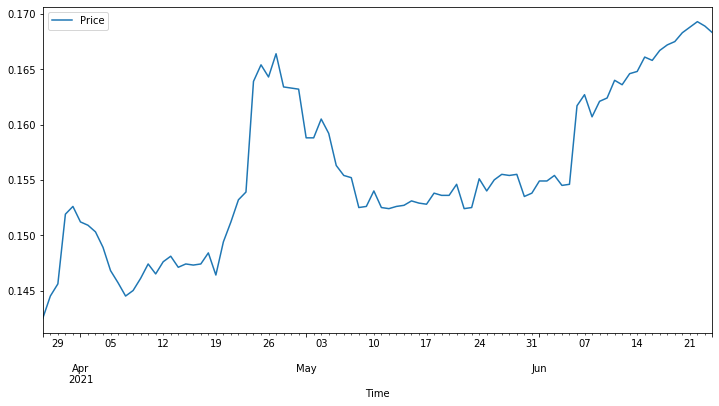

In [143]:
df.plot(figsize=(12,6))

In [144]:
from statsmodels.tsa.seasonal import seasonal_decompose

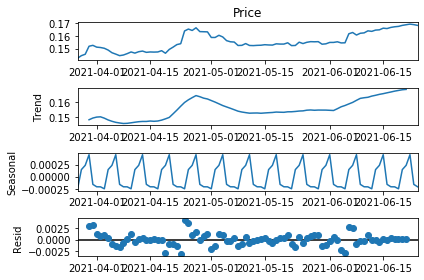

In [145]:
results = seasonal_decompose(df['Price'])
results.plot();

In [146]:
len(df)

90

# Train and Test 

In [147]:
train = df.iloc[:72]
test = df.iloc[72:]

In [148]:
train, test

(             Price
 Time              
 2021-03-27  0.1425
 2021-03-28  0.1445
 2021-03-29  0.1456
 2021-03-30  0.1519
 2021-03-31  0.1526
 ...            ...
 2021-06-02  0.1549
 2021-06-03  0.1554
 2021-06-04  0.1545
 2021-06-05  0.1546
 2021-06-06  0.1617
 
 [72 rows x 1 columns],
              Price
 Time              
 2021-06-07  0.1627
 2021-06-08  0.1607
 2021-06-09  0.1621
 2021-06-10  0.1624
 2021-06-11  0.1640
 2021-06-12  0.1636
 2021-06-13  0.1646
 2021-06-14  0.1648
 2021-06-15  0.1661
 2021-06-16  0.1658
 2021-06-17  0.1667
 2021-06-18  0.1672
 2021-06-19  0.1675
 2021-06-20  0.1683
 2021-06-21  0.1688
 2021-06-22  0.1693
 2021-06-23  0.1689
 2021-06-24  0.1683)

# Scaling the Data

In [149]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [150]:
df.head(),df.tail()

(             Price
 Time              
 2021-03-27  0.1425
 2021-03-28  0.1445
 2021-03-29  0.1456
 2021-03-30  0.1519
 2021-03-31  0.1526,
              Price
 Time              
 2021-06-20  0.1683
 2021-06-21  0.1688
 2021-06-22  0.1693
 2021-06-23  0.1689
 2021-06-24  0.1683)

In [151]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [152]:
scaled_train[:10]

array([[0.        ],
       [0.08368201],
       [0.12970711],
       [0.39330544],
       [0.42259414],
       [0.36401674],
       [0.35146444],
       [0.32635983],
       [0.26778243],
       [0.17991632]])

In [153]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [154]:
num_inputs = 12

In [155]:
# define generator
n_input = num_inputs
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
generator

In [156]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.08368201 0.12970711 0.39330544 0.42259414 0.36401674
 0.35146444 0.32635983 0.26778243 0.17991632 0.13389121 0.08368201]
Predict this y: 
 [[0.10460251]]


In [157]:
X.shape

(1, 12, 1)

# LSTM MODEL

In [158]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [159]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [160]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [161]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
60/60 [==============================] - 1s 4ms/step - loss: 0.0775
Epoch 2/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0295
Epoch 3/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0277
Epoch 4/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0241
Epoch 5/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0225
Epoch 6/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0244
Epoch 7/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0175
Epoch 8/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0183
Epoch 9/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0142
Epoch 10/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0148
Epoch 11/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 12/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0136
Epoch 13/50
60/60 [==============================

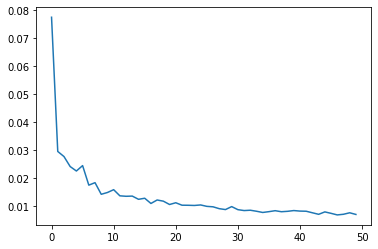

In [162]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [163]:
last_train_batch = scaled_train[-num_inputs:]

In [164]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

# Predicting

In [165]:
model.predict(last_train_batch)

array([[0.743996]], dtype=float32)

In [166]:
scaled_test[0]

array([0.84518828])

In [167]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [168]:
test_predictions

[array([0.743996], dtype=float32),
 array([0.8047019], dtype=float32),
 array([0.8599755], dtype=float32),
 array([0.908267], dtype=float32),
 array([0.95140326], dtype=float32),
 array([0.98792], dtype=float32),
 array([1.0183352], dtype=float32),
 array([1.0438355], dtype=float32),
 array([1.064415], dtype=float32),
 array([1.0817478], dtype=float32),
 array([1.0923046], dtype=float32),
 array([1.0969317], dtype=float32),
 array([1.1009245], dtype=float32),
 array([1.1006786], dtype=float32),
 array([1.0979348], dtype=float32),
 array([1.093183], dtype=float32),
 array([1.0874265], dtype=float32),
 array([1.0799301], dtype=float32)]

In [169]:
test.head()

,Price
Time,
2021-06-07,0.1627
2021-06-08,0.1607
2021-06-09,0.1621
2021-06-10,0.1624
2021-06-11,0.1640


In [170]:
true_predictions = scaler.inverse_transform(test_predictions)

In [171]:
true_predictions

array([[0.1602815 ],
       [0.16173238],
       [0.16305341],
       [0.16420758],
       [0.16523854],
       [0.16611129],
       [0.16683821],
       [0.16744767],
       [0.16793952],
       [0.16835377],
       [0.16860608],
       [0.16871667],
       [0.1688121 ],
       [0.16880622],
       [0.16874064],
       [0.16862707],
       [0.16848949],
       [0.16831033]])

In [172]:
test['Predictions'] = true_predictions

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [173]:
test

,Price,Predictions
Time,,
2021-06-07,0.1627,0.160282
2021-06-08,0.1607,0.161732
2021-06-09,0.1621,0.163053
2021-06-10,0.1624,0.164208
2021-06-11,0.1640,0.165239
2021-06-12,0.1636,0.166111
2021-06-13,0.1646,0.166838
2021-06-14,0.1648,0.167448
2021-06-15,0.1661,0.167940


In [174]:
my_predictions = test.copy()
my_predictions.drop('Price', axis='columns', inplace=True)
my_predictions

,Predictions
Time,
2021-06-07,0.160282
2021-06-08,0.161732
2021-06-09,0.163053
2021-06-10,0.164208
2021-06-11,0.165239
2021-06-12,0.166111
2021-06-13,0.166838
2021-06-14,0.167448
2021-06-15,0.167940


In [175]:
my_test = test.copy()
my_test.drop("Predictions",axis='columns' , inplace=True)
my_test

,Price
Time,
2021-06-07,0.1627
2021-06-08,0.1607
2021-06-09,0.1621
2021-06-10,0.1624
2021-06-11,0.1640
2021-06-12,0.1636
2021-06-13,0.1646
2021-06-14,0.1648
2021-06-15,0.1661


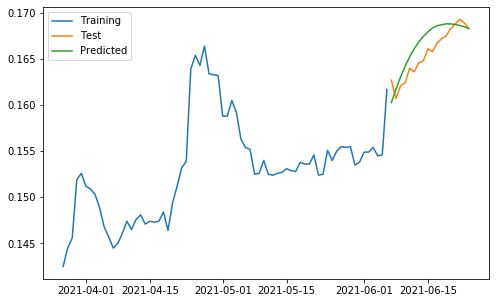

In [176]:
plt.figure(figsize=(8, 5))
plt.plot(train, label="Training")
plt.plot(my_test, label='Test')
# plt.plot(df, label='Data')
plt.plot(my_predictions, label="Predicted")
plt.legend(loc="upper left")
plt.show()

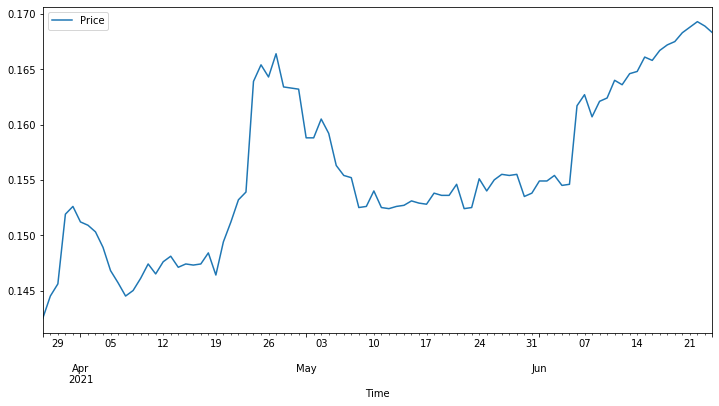

In [177]:
df.plot(figsize=(12,6))

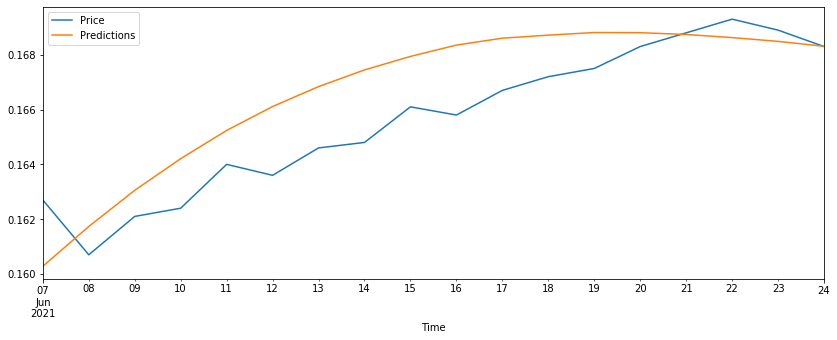

In [178]:
test.plot(figsize=(14,5))

# RMSE and R2 Values

In [179]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
rmse=sqrt(mean_squared_error(test['Price'],test['Predictions']))
print(rmse)

0.0016565254035332743


In [183]:
r2 = r2_score(test['Price'],test['Predictions'])
r2

0.5888149522409407